In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import itertools
from copy import copy

In [5]:
def remove_matched (couples_list) :
    couples_list = [i for i in couples_list if i[0] not in [i[0] for i in perfect_match]]
    couples_list = [i for i in couples_list if i[1] not in [i[1] for i in perfect_match]]
    for i in perfect_match :
        couples_list.append(i)
    return couples_list
def match_remove_matched (couples_list) :
    couples_list = [i for i in couples_list if i[0] not in [i[0] for i in perfect_match]]
    couples_list = [i for i in couples_list if i[1] not in [i[1] for i in perfect_match]]
    return couples_list
def remove_no_match (couples_list) :
    couples_list = [i for i in couples_list if i not in [i for i in no_match]]
    return couples_list
def process_match (match, match_matches) :
    # remove no matches 
    match = remove_no_match(match)
    # remove perfect matches and reduce _matches by that value
    match_perfect_matches = [i for i in match if "".join(i) in ["".join(i) for i in perfect_match]]
    # if the remaining value is 0, add all matches to no_match
    if len(match_perfect_matches) == match_matches :
        match = [i for i in match if "".join(i) not in ["".join(i) for i in perfect_match]]
        for i in match :
            if "".join(i) not in ["".join(i) for i in no_match] :
                no_match.append(i)
            else :
                continue
        match_matches_remaining = match_matches - len(match_perfect_matches)
    else : 
        match_matches_remaining = match_matches - len(match_perfect_matches)
    match = remove_no_match(match_remove_matched(match))
    return (match, match_matches_remaining)
def df_match_probability (match, match_matches) :
    df = pd.DataFrame(data=match, columns=["man","woman"])
    if match_matches == 0 :
        df["probability"] = 0
    else :
        df["probability"] = match_matches/len(match)
    return df
def append_probability (df) :
    for row in df.itertuples(index=False)  :
        for couple in couples_df.itertuples(index=False)  :
            if (row.man == couple.man) & (row.woman == couple.woman) :
                couple.probability.append(row.probability)
            else :
                continue
                #couple.probability.append(np.NaN)
def Score (df):
    if df["Count"] == 0 :
        _ = 0
    else :
        _ = df["Sum"]/df["Count"]
    return _

In [8]:
men=["Giovanni","Cam","Asaf","John","Prosper","Sam","Cameron","Morgan","Stephen","Tyler"]
women=["Kaylen","Victoria","Francesca","Emma","Camille","Alyssa","Mikala","Julia","Nicole","Tori"]
men.sort()
women.sort()
perfect_match = []
no_match = [("Prosper","Tori")]
match1 = [("Giovanni","Kaylen"),("Cam","Victoria"),("Asaf","Francesca"),("John","Emma"),("Prosper","Camille"),("Sam","Alyssa"),
("Cameron","Mikala"),("Morgan","Julia"),("Stephen","Nicole"),("Tyler","Tori")]
match1_matches = 3
match2 = []
match2_matches = 0
match3 = []
match3_matches = 0
match4 = []
match4_matches = 0
match5 = []
match5_matches = 0
match6 = []
match6_matches = 0
match7 = []
match7_matches = 0
match8 = []
match8_matches = 0
match9 = []
match9_matches = 0
match10 = []
match10_matches = 0

In [9]:
for n in reversed(range(1,11)) :
    exec("(match{n}, match{n}_matches) = process_match(match{n}, match{n}_matches)".format(n=n))
for n in range(1,11) :
    exec("(match{n}, match{n}_matches) = process_match(match{n}, match{n}_matches)".format(n=n))
for n in reversed(range(1,11)) :
    exec("(match{n}, match{n}_matches) = process_match(match{n}, match{n}_matches)".format(n=n))
for n in range(1,11) :
    exec("match{n}_df = df_match_probability (match{n}, match{n}_matches)".format(n=n))
all_couples = list(itertools.product(men, women))
remaining_couples = remove_no_match(remove_matched(all_couples))
couples_df = pd.DataFrame(data=remaining_couples, columns=["man","woman"])
couples_df["probability"] = np.empty((len(couples_df), 0)).tolist()
for n in range(1,11) :
    exec("append_probability(match{n}_df)".format(n=n))
couples_df["Sum"] = couples_df["probability"].apply(sum)
couples_df["Count"] = couples_df["probability"].apply(len)
couples_df["Score"] = couples_df.apply(Score, axis=1)
couples_df.to_csv("couples.csv")
couples_df.sort_values(by=["Score","woman"], ascending=False).to_csv("couples_rank.csv")
couples_df.sort_values(by=["Score","woman"], ascending=False).head(10)


,man,woman,probability,Sum,Count,Score
19,Cam,Victoria,[0.3],0.3,1,0.3
97,Tyler,Tori,[0.3],0.3,1,0.3
86,Stephen,Nicole,[0.3],0.3,1,0.3
26,Cameron,Mikala,[0.3],0.3,1,0.3
35,Giovanni,Kaylen,[0.3],0.3,1,0.3
54,Morgan,Julia,[0.3],0.3,1,0.3
3,Asaf,Francesca,[0.3],0.3,1,0.3
42,John,Emma,[0.3],0.3,1,0.3
61,Prosper,Camille,[0.3],0.3,1,0.3
69,Sam,Alyssa,[0.3],0.3,1,0.3


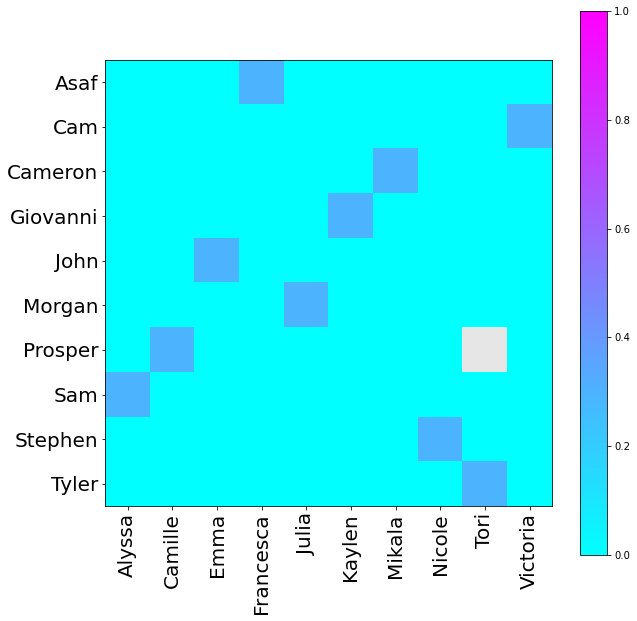

In [11]:
all_couples_df = pd.DataFrame(data=all_couples, columns=["man","woman"]).sort_values(by=["man","woman"])
all_couples_df = all_couples_df.merge(couples_df, how="left", right_on=["man","woman"], left_on=["man","woman"])
for i in perfect_match :
    for row in all_couples_df.itertuples():
        if (i[0] == row[1]) & (i[1] == row[2]) :
            all_couples_df.at[row[0], 'Score'] = 1
        else :
            continue
df = (all_couples_df.groupby(["man"])
      .agg({'Score': lambda x: x.tolist()})
      .rename({'Score' : 'Scores'},axis=1)
      .reset_index())
scores = [
    i[1] for i in df.itertuples(index=False)
]
pallete = copy(plt.cm.cool)
pallete.set_bad("k",.1)
plt.imshow(scores, cmap=pallete, vmin=0, vmax=1)
plt.xticks(ticks=range(0,10), labels=women, rotation=90)
plt.yticks(ticks=range(0,10), labels=men)
plt.colorbar()
plt.gcf().set_size_inches(10,10)
plt.gca().tick_params(axis='both', which='major', labelsize=20)
plt.show()

In [12]:
couples_df.sort_values(by=["Sum","woman"], ascending=False).head(10)

,man,woman,probability,Sum,Count,Score
19,Cam,Victoria,[0.3],0.3,1,0.3
97,Tyler,Tori,[0.3],0.3,1,0.3
86,Stephen,Nicole,[0.3],0.3,1,0.3
26,Cameron,Mikala,[0.3],0.3,1,0.3
35,Giovanni,Kaylen,[0.3],0.3,1,0.3
54,Morgan,Julia,[0.3],0.3,1,0.3
3,Asaf,Francesca,[0.3],0.3,1,0.3
42,John,Emma,[0.3],0.3,1,0.3
61,Prosper,Camille,[0.3],0.3,1,0.3
69,Sam,Alyssa,[0.3],0.3,1,0.3
